# lighteval is your AI evaluation library

This notebook explores how you can use lighteval to evaluate and compare LLMs.

`lighteval` has been around a while and it's a great tool for getting eval score on major benchmarks. It's just been refactored to support being used like a library in Python, which makes it great for comparing models across benchmarks.

So let's dig in to some eval scores.


## Install dependencies

In [ ]:
!pip install -qqq -U "torch<2.5" "torchvision<2.5" "torchaudio<2.5" --index-url https://download.pytorch.org/whl/cu121
!pip list | grep torch

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 798.9/798.9 MB 2.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.4/3.4 MB 38.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 23.7/23.7 MB 81.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 823.6/823.6 kB 36.4 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 14.1/14.1 MB 86.5 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
!pip install -qqq git+https://github.com/huggingface/lighteval.git tiktoken

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 51.8/51.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 137.6/137.6 kB 10.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 36.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6.6/6.6 MB 64.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.2/1.2 MB 58.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

## Setup `lighteval` evaluation

We need to setup the evaluation environment and pipeline. Much of this we will disable because we're keeping things in the notebook, but we could also use `push_to_hub` or `push_to_tensorboard`.

### `push_to_hub`

This is useful if we're evaluating a model and want to persist its evaluation with weights and configuration on the Hugging Face hub.

### `push_to_tensorboard`

This would be useful if we were building an evaluation tool or script, where we wanted to view results within tensorboard.

In [ ]:
import lighteval
import os
from datetime import timedelta
from transformers import AutoModelForCausalLM

from lighteval.logging.evaluation_tracker import EvaluationTracker
from lighteval.logging.hierarchical_logger import hlog_warn, htrack
from lighteval.models.model_config import create_model_config
from lighteval.pipeline import EnvConfig, ParallelismManager, Pipeline, PipelineParameters

TOKEN = os.getenv("HF_TOKEN")

tokenizer_config.json:   0%|          | 0.00/371 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/783 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/17.6M [00:00<?, ?B/s]

INFO:absl:Using default tokenizer.
INFO:absl:Using default tokenizer.
INFO:absl:Using default tokenizer.
INFO:absl:Using default tokenizer.
INFO:absl:Using default tokenizer.


In [ ]:
env_config = EnvConfig(token=TOKEN, cache_dir="~/tmp")

evaluation_tracker = EvaluationTracker(
    output_dir="~/tmp",
    save_details=False,
    push_to_hub=False,
    push_to_tensorboard=False,
    public=False,
    hub_results_org=False,
)

pipeline_params = PipelineParameters(
    launcher_type=ParallelismManager.ACCELERATE,
    env_config=env_config,
    job_id=1,
    override_batch_size=1,
    num_fewshot_seeds=0,
    max_samples=10,
    use_chat_template=False,
)

# Compares models with `lighteval`

We are going to compare two small LLMs on a domain. We will use `Qwen2.5-0.5B` and `SmolLM2-360M-Instruct` and we will evaluate them on a medical domain.

We can create a domain evaluation from a subset of MMLU evaluations, by defining the evaluation tasks. In lighteval, tasks are described as strings.

`{suite}|{task}:{subtask}|{num_few_shot}|{0 or 1 to reduce num_few_shot if prompt is too long}`

Therefore, we will pass our list of medicine related tasks like this:

```
"leaderboard|mmlu:anatomy|5|0,leaderboard|mmlu:professional_medicine|5|0,leaderboard|mmlu:high_school_biology|5|0,leaderboard|mmlu:high_school_chemistry|5|0"
```

Which can be translated to :

| Suite | Task | Num Fewshot Example | Limit Fewshots |
|---|---|---|---|
| leaderboard | mmlu:anatomy | 5 | False |
| leaderboard | mmlu:professional_medicine | 5 | False |
| leaderboard | mmlu:high_school_biology | 5 | False |
| leaderboard | mmlu:high_school_chemistry | 5 | False |

For a full list of lighteval supported tasks. Checkout this page in [the documentation](https://github.com/huggingface/lighteval/wiki/Available-Tasks).

In [ ]:
domain_tasks = "leaderboard|mmlu:anatomy|5|0,leaderboard|mmlu:professional_medicine|5|0,leaderboard|mmlu:high_school_biology|5|0,leaderboard|mmlu:high_school_chemistry|5|0"

# Evaluate Qwen2.5 0.5B

In [ ]:
qwen_model = AutoModelForCausalLM.from_pretrained("Qwen/Qwen2.5-0.5B")

pipeline = Pipeline(
    tasks=domain_tasks,
    pipeline_parameters=pipeline_params,
    evaluation_tracker=evaluation_tracker,
    model=qwen_model
)

pipeline.evaluate()

qwen_results = pipeline.get_results()

config.json:   0%|          | 0.00/681 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/39.7k [00:00<?, ?B/s]

mmlu.py:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/47.5M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/20.1k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/5.28k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/135 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/14 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

0000.parquet:   0%|          | 0.00/62.7k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/4.94k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/310 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/32 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

0000.parquet:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/8.31k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/4.16k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/203 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/22 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

0000.parquet:   0%|          | 0.00/125k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/8.45k [00:00<?, ?B/s]

Generating auxiliary_train split:   0%|          | 0/99842 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/272 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/31 [00:00<?, ? examples/s]

Generating dev split:   0%|          | 0/5 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (334 > 20). Running this sequence through the model will result in indexing errors
0it [00:00, ?it/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [00:01<00:00, 21.68it/s]
1it [00:01,  1.85s/it]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [00:01<00:00, 34.87it/s]
2it [00:03,  1.44s/it]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [00:01<00:00, 35.17it/s]
3it [00:04,  1.31s/it]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [00:01<00:00, 35.26it/s]
4it [00:05,  1.32s/it]


# Evaluate SmolLM 360M

In [ ]:
smol_model = AutoModelForCausalLM.from_pretrained("HuggingFaceTB/SmolLM2-360M-Instruct")

pipeline = Pipeline(
    tasks=domain_tasks,
    pipeline_parameters=pipeline_params,
    evaluation_tracker=evaluation_tracker,
    model=smol_model
)

pipeline.evaluate()

config.json:   0%|          | 0.00/846 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/724M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/132 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (341 > 20). Running this sequence through the model will result in indexing errors
0it [00:00, ?it/s]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [00:01<00:00, 25.74it/s]
1it [00:01,  1.56s/it]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [00:01<00:00, 25.66it/s]
2it [00:03,  1.56s/it]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [00:01<00:00, 25.48it/s]
3it [00:04,  1.57s/it]
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 40/40 [00:01<00:00, 25.36it/s]
4it [00:06,  1.57s/it]


In [ ]:
smol_results = pipeline.get_results()

In [ ]:
pipeline.show_results()

|                  Task                  |Version|Metric|Value |   |Stderr|
|----------------------------------------|------:|------|-----:|---|-----:|
|all                                     |       |acc   |0.3333|¬±  |0.1169|
|leaderboard:mmlu:_average:5             |       |acc   |0.3400|¬±  |0.1121|
|leaderboard:mmlu:anatomy:5              |      0|acc   |0.4500|¬±  |0.1141|
|leaderboard:mmlu:high_school_biology:5  |      0|acc   |0.1500|¬±  |0.0819|
|leaderboard:mmlu:high_school_chemistry:5|      0|acc   |0.3500|¬±  |0.1094|
|leaderboard:mmlu:professional_medicine:5|      0|acc   |0.4500|¬±  |0.1141|



# Visualize Results

Now that we have results from the two models we can visualize them side-by-side. We'll keep visualisation simple here, but with this data structure you could represent scores in many ways.

<Axes: >

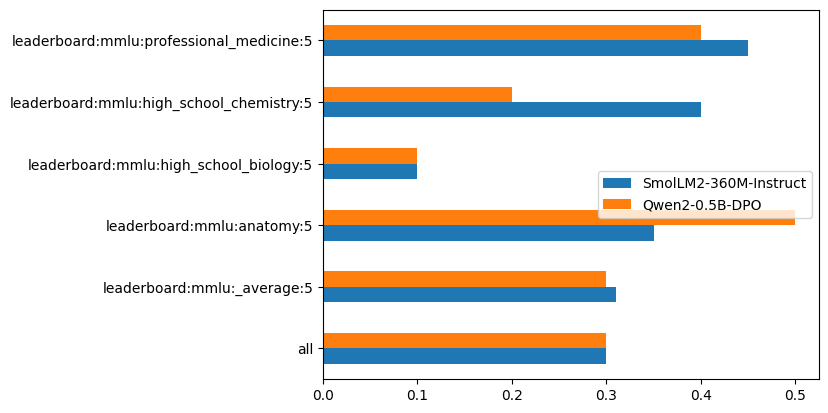

In [ ]:
import pandas as pd

df = pd.DataFrame.from_records(smol_results["results"]).T["acc"].rename("SmolLM2-360M-Instruct")
_df = pd.DataFrame.from_records(qwen_results["results"]).T["acc"].rename("Qwen2-0.5B-DPO")
df = pd.concat([df, _df], axis=1)
df.plot(kind="barh")

# üíê That's it!

You have a handy notebook to view model evals. You could use this to:

- select the right model for your inference use case
- evaluate checkpoints during training
- share model scores

üèÉNext Steps

- If you want to go deeper into your evaluation results check out this [notebook](https://github.com/huggingface/evaluation-guidebook/blob/main/contents/examples/comparing_task_formulations.ipynb)
- If you want to define custom evaluation tasks for your domain, check out this [tutorial](https://github.com/argilla-io/argilla-cookbook/tree/main/domain-eval)